# Seafood Restaurant Expansion SC

A business owner with the Yachtsman Group is looking to expand their popular seafood restaurant into South Carolina. They have a couple of models of their restaurant (the Yacht Stop - mid-range menu pricing and the Yacht Club -  upscale). They would like to know what the market looks like in the state for restaurants, particularly seafood restaurants. If the market is open for their restaurant models, the business owner will commit to opening two restaurants in the state to start.
I will identify the types of restaurants in the cities and towns. 

I will use this information along with location information to determine which areas would be the best options to open seafood restaurant(s).

#### Load necessary libraries.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
from pandas.io.json import json_normalize
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import xml
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


#### Import SC data to summarize city info.

In [2]:
# Data source for the scrape is the wiki url
WIKI_URL="https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_South_Carolina"

# Pull data from the source url in xml format
req = requests.get(WIKI_URL)
soup = BeautifulSoup(req.content, 'lxml')

# Scrape the table data from the Wiki source required for this project
tables = soup.find("table", class_="wikitable sortable")

# Create an empty dataframe with a column to hold towm/city names
col_names =  ['Name']
df  = pd.DataFrame(columns = col_names)


# Parse the sortable table data from source, search for tr and td tags, and load the table data into the pandas dataframe
for tr in tables.find_all('tr'):
   tds = tr.find_all('td')
   if not tds:
      continue
   Name = [td.text.strip()+', SC' for td in tds[:1]]
   if "Total, SC" in Name:
      continue
   df.loc[len(df)] = Name

df.shape

(270, 1)

#### Data Analysis: This section is to verify and clean data, as well as gather additional locaction information.

In [3]:
df.columns

Index(['Name'], dtype='object')

In [4]:
df.head(5)

,Name
0,"Abbeville, SC"
1,"Aiken, SC"
2,"Allendale, SC"
3,"Anderson, SC"
4,"Andrews, SC"


In [6]:
address = "South Carolina"
geolocator = Nominatim(user_agent="sc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of South Carolina are {},{}.'.format(latitude, longitude))

The geographical coordinates of South Carolina are 33.6874388,-80.4363743.


In [7]:
df.to_csv('sccities_geo.csv',index=False)

In [8]:
df_sc = pd.read_csv('sccities_geo.csv')
df_sc.shape

(270, 3)

In [9]:
df_sc.head()

,Name,latitude,longitude
0,"Abbeville, SC",34.177949,-82.379246
1,"Aiken, SC",33.559859,-81.721952
2,"Allendale, SC",32.963501,-81.340006
3,"Anderson, SC",34.506860,-82.650626
4,"Andrews, SC",33.451278,-79.560897


In [10]:
df = df_sc
del(df_sc)
df

,Name,latitude,longitude
0,"Abbeville, SC",34.177949,-82.379246
1,"Aiken, SC",33.559859,-81.721952
2,"Allendale, SC",32.963501,-81.340006
3,"Anderson, SC",34.506860,-82.650626
4,"Andrews, SC",33.451278,-79.560897
5,"Arcadia Lakes, SC",34.053765,-80.961201
6,"Atlantic Beach, SC",33.802564,-78.716772
7,"Awendaw, SC",33.037670,-79.613127
8,"Aynor, SC",33.999888,-79.199487
9,"Bamberg, SC",33.213015,-81.016623


So much of the data above had null values. Must remove those before moving forward.

In [11]:
df=df.dropna(subset=['latitude'])
df=df.dropna(subset=['longitude'])
df

,Name,latitude,longitude
0,"Abbeville, SC",34.177949,-82.379246
1,"Aiken, SC",33.559859,-81.721952
2,"Allendale, SC",32.963501,-81.340006
3,"Anderson, SC",34.506860,-82.650626
4,"Andrews, SC",33.451278,-79.560897
5,"Arcadia Lakes, SC",34.053765,-80.961201
6,"Atlantic Beach, SC",33.802564,-78.716772
7,"Awendaw, SC",33.037670,-79.613127
8,"Aynor, SC",33.999888,-79.199487
9,"Bamberg, SC",33.213015,-81.016623


#### Visualization Section

In [12]:
# create a map of South Carolina using latitude and longitude values
map_sc = folium.Map(location=[33.6874388, -80.4363743], zoom_start=7)

# add markers to map
for lat, lng, Name in zip(df['latitude'], df['longitude'], df['Name']):
    label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sc)  
    
map_sc

#### Using Foursquare

In [13]:
# The code was removed by Watson Studio for sharing.

In [15]:
# Use foursquare and get top N velues for each SC city
# Setting radius of 100,  and limiting no of venues to 50
LIMIT = 100 # limit of number of venues returned by Foursquare API
rad = 5000 # define radius
section = 'Food'

def getNearbyVenues(names, latitudes, longitudes, radius=rad):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            section)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
sc_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

In [17]:
print(sc_venues.shape)

(3035, 7)


In [18]:
sc_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Abbeville, SC",34.177949,-82.379246,The Village Grill,34.177727,-82.379931,New American Restaurant
1,"Abbeville, SC",34.177949,-82.379246,Maria's Mexican Restaurant,34.177769,-82.379426,Mexican Restaurant
2,"Abbeville, SC",34.177949,-82.379246,Subway,34.173171,-82.376741,Sandwich Place
3,"Abbeville, SC",34.177949,-82.379246,Pizza Hut,34.162458,-82.382990,Pizza Place
4,"Abbeville, SC",34.177949,-82.379246,Hardee's,34.173517,-82.375417,Fast Food Restaurant


In [20]:
sc_venues.to_csv('scvenues.csv',index=False)

In [21]:
import pandas as pd
sc = pd.read_csv('scvenues.csv')
sc.shape

(3035, 7)

In [22]:
print("There are a total of {} venues, and the total distinct venue categories is {}".format(sc.shape[0], sc["Venue Category"].nunique()))

There are a total of 3035 venues, and the total distinct venue categories is 65


In [23]:
sc.head(50)

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Abbeville, SC",34.177949,-82.379246,The Village Grill,34.177727,-82.379931,New American Restaurant
1,"Abbeville, SC",34.177949,-82.379246,Maria's Mexican Restaurant,34.177769,-82.379426,Mexican Restaurant
2,"Abbeville, SC",34.177949,-82.379246,Subway,34.173171,-82.376741,Sandwich Place
3,"Abbeville, SC",34.177949,-82.379246,Pizza Hut,34.162458,-82.382990,Pizza Place
4,"Abbeville, SC",34.177949,-82.379246,Hardee's,34.173517,-82.375417,Fast Food Restaurant
5,"Abbeville, SC",34.177949,-82.379246,KFC,34.172641,-82.375282,Fried Chicken Joint
6,"Abbeville, SC",34.177949,-82.379246,Taco Bell,34.172700,-82.375270,Fast Food Restaurant
7,"Abbeville, SC",34.177949,-82.379246,Milano's Greek & Italian,34.177382,-82.379114,Greek Restaurant
8,"Abbeville, SC",34.177949,-82.379246,The Rough House,34.177949,-82.378716,Hot Dog Joint
9,"Abbeville, SC",34.177949,-82.379246,Dutch Oven,34.178569,-82.379770,Southern / Soul Food Restaurant


In [24]:
# Mapping restaurants into the same venue category of American Restaurant
sc.loc[sc['Venue Category'] == "New American Restaurant", 'Venue Category'] = "American Restaurant"
sc.loc[sc['Venue Category'] == "Theme Restaurant", 'Venue Category'] = "American Restaurant"

In [25]:
# Mapping restaurants into the same venue category of Asian Restaurant
sc.loc[sc['Venue Category'] == "Japanese", 'Venue Category'] = "Asian Restaurant"
sc.loc[sc['Venue Category'] == "Indian", 'Venue Category'] = "Asian Restaurant"
sc.loc[sc['Venue Category'] == "Vietnamese", 'Venue Category'] = "Asian Restaurant"
sc.loc[sc['Venue Category'] == "Chinese", 'Venue Category'] = "Asian Restaurant"

In [26]:
# Mapping any of the mex restaurants into the same venue category of Mexican Restaurant
sc.loc[sc['Venue Category'] == "Taco Place", 'Venue Category'] = "Mexican Restaurant"
sc.loc[sc['Venue Category'] == "Burrito Place", 'Venue Category'] = "Mexican Restaurant"
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('mex')), 'Venue Category'] = "Mexican Restaurant"

In [27]:
# Mapping any of the pizza restaurants into the same venue category of Pizza Place
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('pizza')), 'Venue Category'] = "Pizza Place"

In [28]:
# Mapping any of the sub restaurants into the same venue category of Sandwich Place
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('sub')), 'Venue Category'] = "Sandwich Place"

In [29]:
# Mapping any of the wing food place into the same venue category of Wings Joint
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('wing')), 'Venue Category'] = "Wings Joint"

In [30]:
# Mapping any of the wing food place into the same venue category of Wings Joint
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('chicken')), 'Venue Category'] = "Fried Chicken Joint"

In [31]:
# Mapping any of the wing food place into the same venue category of Wings Joint
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('steak')), 'Venue Category'] = "Steakhouse"

In [32]:
# Mapping any of the mex restaurants into the same venue category of Breakfast Restaurant
sc.loc[sc['Venue Category'] == "Waffle House", 'Venue Category'] = "Breakfast Restaurant"
sc.loc[sc['Venue Category'] == "IHOP", 'Venue Category'] = "Breakfast Restaurant"
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('break')), 'Venue Category'] = "Breakfast Place"

In [33]:
# Mapping any of the chains into the same venue category of Fast Food Restaurant
sc.loc[(sc['Venue Category'] == "Restaurant") & (sc['Venue'].str.contains('Chick-fil-A')), 'Venue Category'] = "Fast Food Restaurant"
sc.loc[(sc['Venue Category'] == "Food") & (sc['Venue'].str.contains('K F C')), 'Venue Category'] = "Fast Food Restaurant"
sc.loc[(sc['Venue Category'] == "Food") & (sc['Venue'].str.contains('Mc')), 'Venue Category'] = "Fast Food Restaurant"
sc.loc[(sc['Venue Category'] == "Food") & (sc['Venue'].str.contains('Burger')), 'Venue Category'] = "Fast Food Restaurant"

In [34]:
# Mapping any of the mid eastern restaurants into the same venue category of Mediterranean Restaurant
sc.loc[(sc['Venue Category'] == "Restaurant") & (sc['Venue'].str.contains('Zoe')), 'Venue Category'] = "Mediterranean Restaurant"
sc.loc[(sc['Venue Category'] == "Restaurant") & (sc['Venue'].str.contains('gree')), 'Venue Category'] = "Mediterranean Restaurant"

In [35]:
# Mapping any of the mid eastern restaurants into the same venue category of Seafood Restaurant
sc.loc[(sc['Venue Category'] == "Restaurant") & (sc['Venue'].str.contains('seaf')), 'Venue Category'] = "Seafood Restaurant"
sc.loc[(sc['Venue Category'] == "Restaurant") & (sc['Venue'].str.contains('crab')), 'Venue Category'] = "Seafood Restaurant"

In [36]:
# Mapping any of the bbq restaurant/food into the same venue category of BBQ Joint:
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('B-')), 'Venue Category'] = "BBQ Joint"
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('bar')), 'Venue Category'] = "BBQ Joint"
sc.loc[(sc['Venue Category'].isin(["Restaurant","Food"])) & (sc['Venue'].str.contains('bar b')), 'Venue Category'] = "BBQ Joint"

In [37]:
print('Total rows with cateogry = Food : ',sc.loc[sc['Venue Category'] == 'Food', 'Venue Category'].count())
print('Total rows with cateogry = Restaurant : ',sc.loc[sc['Venue Category'] == 'Restaurant', 'Venue Category'].count())
print('Total rows in final dataframe : ',sc.shape[0])

Total rows with cateogry = Food :  70
Total rows with cateogry = Restaurant :  98
Total rows in final dataframe :  3035


In [38]:
# Map all remaining food venues to American Restaurant (decided as default)
sc.loc[sc['Venue Category'] == "Food", 'Venue Category'] = "American Restaurant"
#sc.drop(sc[sc['Venue Category'] == "Food"].index, inplace=True)
#sc.drop(sc[sc['Venue Category'] == "Restaurant"].index, inplace=True)
#sc.reset_index(drop=True, inplace=True)
                      
# Map all remaining restuarants to American Restaurant (decided as default)
sc.loc[sc['Venue Category'] == "Restaurant", 'Venue Category'] = "American Restaurant"

In [39]:
sc_venues = sc
sc_venues.groupby('City').count()

,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
"Abbeville, SC",17,17,17,17,17,17
"Aiken, SC",58,58,58,58,58,58
"Anderson, SC",100,100,100,100,100,100
"Andrews, SC",7,7,7,7,7,7
"Arcadia Lakes, SC",100,100,100,100,100,100
"Atlantic Beach, SC",88,88,88,88,88,88
"Awendaw, SC",2,2,2,2,2,2
"Aynor, SC",13,13,13,13,13,13
"Barnwell, SC",19,19,19,19,19,19


In [40]:
print('There are {} uniques categories.'.format(len(sc_venues['Venue Category'].unique())))

There are 60 uniques categories.


In [41]:
print('There are {} uniques cities.'.format(len(sc_venues['City'].unique())))

There are 102 uniques cities.


#### Grouping Venues

In [42]:
sc = sc_venues.groupby(['Venue Category']).count()[['Venue']].sort_values('Venue', ascending=False).head(10)
sc

,Venue
Venue Category,
American Restaurant,513
Fast Food Restaurant,358
Pizza Place,270
Sandwich Place,257
Mexican Restaurant,160
Seafood Restaurant,133
Breakfast Spot,115
BBQ Joint,90
Burger Joint,89


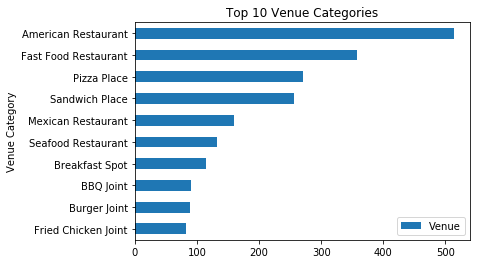

In [44]:
import matplotlib.pyplot as plt
sc.sort_values('Venue',inplace=True)
sc.plot(kind='barh')
plt.title("Top 10 Venue Categories")
plt.show()

In [45]:
# one hot encoding
sc_onehot = pd.get_dummies(sc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sc_onehot['City'] = sc_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [sc_onehot.columns[-1]] + list(sc_onehot.columns[:-1])
sc_onehot = sc_onehot[fixed_columns]

sc_onehot.head()

,City,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Diner,Donut Shop,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Pizza Place,Poke Place,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Abbeville, SC",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Abbeville, SC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Abbeville, SC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Abbeville, SC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Abbeville, SC",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
sc_onehot.shape

(3035, 61)

In [47]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
sc_grouped = sc_onehot.groupby('City').mean().reset_index()
sc_grouped

,City,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Diner,Donut Shop,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Pizza Place,Poke Place,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Abbeville, SC",0.00,0.235294,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.176471,0.000000,0.000000,0.00,0.000000,0.000000,0.058824,0.000000,0.000000,0.117647,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.058824,0.00,0.00,0.058824,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,"Aiken, SC",0.00,0.172414,0.000000,0.017241,0.000000,0.000000,0.00,0.000000,0.034483,0.000000,0.034483,0.000000,0.017241,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000,0.017241,0.034483,0.155172,0.000000,0.000000,0.00,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.00,0.00,0.034483,0.00,0.00,0.155172,0.000000,0.000000,0.172414,0.017241,0.000000,0.000000,0.000000,0.017241,0.034483,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.017241
2,"Anderson, SC",0.00,0.210000,0.030000,0.010000,0.010000,0.010000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.060000,0.020000,0.200000,0.000000,0.000000,0.00,0.000000,0.000000,0.050000,0.010000,0.000000,0.010000,0.020000,0.000000,0.000000,0.010000,0.030000,0.000000,0.00,0.00,0.060000,0.00,0.00,0.090000,0.000000,0.000000,0.070000,0.010000,0.000000,0.000000,0.010000,0.010000,0.010000,0.000000,0.010000,0.010000,0.000000,0.00,0.000000,0.000000,0.000000
3,"Andrews, SC",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.00,0.142857,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,"Arcadia Lakes, SC",0.00,0.070000,0.010000,0.020000,0.010000,0.020000,0.00,0.000000,0.050000,0.010000,0.030000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.000000,0.040000,0.010000,0.010000,0.110000,0.000000,0.010000,0.01,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.020000,0.040000,0.01,0.01,0.070000,0.00,0.00,0.080000,0.000000,0.000000,0.120000,0.040000,0.000000,0.000000,0.010000,0.030000,0.010000,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.010000,0.010000
5,"Atlantic Beach, SC",0.00,0.159091,0.034091,0.034091,0.022727,0.011364,0.00,0.000000,0.090909,0.011364,0.068182,0.000000,0.011364,0.000000,0.000000,0.011364,0.000000,0.000000,0.022727,0.000000,0.022727,0.022727,0.000000,0.011364,0.00,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.000000,0.000000,0.011364,0.045455,0.000000,0.000000,0.00,0.00,0.034091,0.00,0.00,0.090909,0.000000,0.000000,0.045455,0.102273,0.0

In [48]:
# sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
import numpy as np
# display the top 10 venues for each city.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = sc_grouped['City']

for ind in np.arange(sc_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sc_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head(8)

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbeville, SC",American Restaurant,Fast Food Restaurant,Greek Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Pizza Place,Creperie,Café,Sandwich Place,Mexican Restaurant
1,"Aiken, SC",Sandwich Place,American Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Sushi Restaurant,Mexican Restaurant,Breakfast Spot,Burger Joint
2,"Anderson, SC",American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Diner,Mexican Restaurant,Fried Chicken Joint,Asian Restaurant,Japanese Restaurant,Breakfast Spot
3,"Andrews, SC",Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Italian Restaurant,Pizza Place,Diner,Wings Joint,Cuban Restaurant,Chinese Restaurant,Creperie
4,"Arcadia Lakes, SC",Sandwich Place,Fast Food Restaurant,Pizza Place,American Restaurant,Mexican Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Korean Restaurant,Seafood Restaurant
5,"Atlantic Beach, SC",American Restaurant,Seafood Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Steakhouse,Italian Restaurant,Sandwich Place,Mexican Restaurant,BBQ Joint
6,"Awendaw, SC",American Restaurant,Food Truck,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
7,"Aynor, SC",Fast Food Restaurant,American Restaurant,Breakfast Spot,Italian Restaurant,Sandwich Place,Café,Donut Shop,Chinese Restaurant,Fish & Chips Shop,Creperie


In [50]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 10

sc_grouped_clustering = sc_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([0, 0, 0, 8, 0, 2, 6, 0, 0, 0, 2, 8, 0, 6, 0, 4, 4, 1, 0, 2], dtype=int32)

#### Clustering

In [51]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sc_merged = df

# merge sc_grouped with sc_data to add latitude/longitude for each neighborhood
sc_merged = sc_merged.join(cities_venues_sorted.set_index('City'), on='Name')

sc_merged.head()

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbeville, SC",34.177949,-82.379246,0.0,American Restaurant,Fast Food Restaurant,Greek Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Pizza Place,Creperie,Café,Sandwich Place,Mexican Restaurant
1,"Aiken, SC",33.559859,-81.721952,0.0,Sandwich Place,American Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Sushi Restaurant,Mexican Restaurant,Breakfast Spot,Burger Joint
2,"Allendale, SC",32.963501,-81.340006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Anderson, SC",34.506860,-82.650626,0.0,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Diner,Mexican Restaurant,Fried Chicken Joint,Asian Restaurant,Japanese Restaurant,Breakfast Spot
4,"Andrews, SC",33.451278,-79.560897,8.0,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Italian Restaurant,Pizza Place,Diner,Wings Joint,Cuban Restaurant,Chinese Restaurant,Creperie


In [52]:
sc_merged.dropna()

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbeville, SC",34.177949,-82.379246,0.0,American Restaurant,Fast Food Restaurant,Greek Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Pizza Place,Creperie,Café,Sandwich Place,Mexican Restaurant
1,"Aiken, SC",33.559859,-81.721952,0.0,Sandwich Place,American Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Sushi Restaurant,Mexican Restaurant,Breakfast Spot,Burger Joint
3,"Anderson, SC",34.506860,-82.650626,0.0,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Diner,Mexican Restaurant,Fried Chicken Joint,Asian Restaurant,Japanese Restaurant,Breakfast Spot
4,"Andrews, SC",33.451278,-79.560897,8.0,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Italian Restaurant,Pizza Place,Diner,Wings Joint,Cuban Restaurant,Chinese Restaurant,Creperie
5,"Arcadia Lakes, SC",34.053765,-80.961201,0.0,Sandwich Place,Fast Food Restaurant,Pizza Place,American Restaurant,Mexican Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Korean Restaurant,Seafood Restaurant
6,"Atlantic Beach, SC",33.802564,-78.716772,2.0,American Restaurant,Seafood Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Steakhouse,Italian Restaurant,Sandwich Place,Mexican Restaurant,BBQ Joint
7,"Awendaw, SC",33.037670,-79.613127,6.0,American Restaurant,Food Truck,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
8,"Aynor, SC",33.999888,-79.199487,0.0,Fast Food Restaurant,American Restaurant,Breakfast Spot,Italian Restaurant,Sandwich Place,Café,Donut Shop,Chinese Restaurant,Fish & Chips Shop,Creperie
10,"Barnwell, SC",33.244873,-81.358718,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Food Truck,Sandwich Place,Seafood Restaurant,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery
11,"Batesburg-Leesville, SC",33.910142,-81.537326,0.0,Fast Food Restaurant,Mexican Restaurant,Café,American Restaurant,BBQ Joint,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Breakfast Spot,Japanese Restaurant


In [53]:
sc_merged[pd.isnull(sc_merged['1st Most Common Venue'])].shape[0]

11

In [54]:
sc_merged.dropna()

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbeville, SC",34.177949,-82.379246,0.0,American Restaurant,Fast Food Restaurant,Greek Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Pizza Place,Creperie,Café,Sandwich Place,Mexican Restaurant
1,"Aiken, SC",33.559859,-81.721952,0.0,Sandwich Place,American Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Sushi Restaurant,Mexican Restaurant,Breakfast Spot,Burger Joint
3,"Anderson, SC",34.506860,-82.650626,0.0,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Diner,Mexican Restaurant,Fried Chicken Joint,Asian Restaurant,Japanese Restaurant,Breakfast Spot
4,"Andrews, SC",33.451278,-79.560897,8.0,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Italian Restaurant,Pizza Place,Diner,Wings Joint,Cuban Restaurant,Chinese Restaurant,Creperie
5,"Arcadia Lakes, SC",34.053765,-80.961201,0.0,Sandwich Place,Fast Food Restaurant,Pizza Place,American Restaurant,Mexican Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Korean Restaurant,Seafood Restaurant
6,"Atlantic Beach, SC",33.802564,-78.716772,2.0,American Restaurant,Seafood Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Steakhouse,Italian Restaurant,Sandwich Place,Mexican Restaurant,BBQ Joint
7,"Awendaw, SC",33.037670,-79.613127,6.0,American Restaurant,Food Truck,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
8,"Aynor, SC",33.999888,-79.199487,0.0,Fast Food Restaurant,American Restaurant,Breakfast Spot,Italian Restaurant,Sandwich Place,Café,Donut Shop,Chinese Restaurant,Fish & Chips Shop,Creperie
10,"Barnwell, SC",33.244873,-81.358718,0.0,Fast Food Restaurant,American Restaurant,Pizza Place,Food Truck,Sandwich Place,Seafood Restaurant,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery
11,"Batesburg-Leesville, SC",33.910142,-81.537326,0.0,Fast Food Restaurant,Mexican Restaurant,Café,American Restaurant,BBQ Joint,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Breakfast Spot,Japanese Restaurant


In [55]:
sc_merged.dropna(inplace=True)

In [57]:
sc_merged[pd.isnull(sc_merged['1st Most Common Venue'])]

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [58]:
sc_merged['Cluster Labels'] = sc_merged['Cluster Labels'].apply(lambda x: int(x) if x == x else 0)
sc_merged.head()

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbeville, SC",34.177949,-82.379246,0,American Restaurant,Fast Food Restaurant,Greek Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Pizza Place,Creperie,Café,Sandwich Place,Mexican Restaurant
1,"Aiken, SC",33.559859,-81.721952,0,Sandwich Place,American Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Sushi Restaurant,Mexican Restaurant,Breakfast Spot,Burger Joint
3,"Anderson, SC",34.506860,-82.650626,0,American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Diner,Mexican Restaurant,Fried Chicken Joint,Asian Restaurant,Japanese Restaurant,Breakfast Spot
4,"Andrews, SC",33.451278,-79.560897,8,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Italian Restaurant,Pizza Place,Diner,Wings Joint,Cuban Restaurant,Chinese Restaurant,Creperie
5,"Arcadia Lakes, SC",34.053765,-80.961201,0,Sandwich Place,Fast Food Restaurant,Pizza Place,American Restaurant,Mexican Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Korean Restaurant,Seafood Restaurant


In [59]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[33.6874388, -80.4363743], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sc_merged['latitude'], sc_merged['longitude'], sc_merged['Name'], sc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
# Cluster 1
sc_merged.loc[sc_merged['Cluster Labels'] == 0, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbeville, SC",American Restaurant,Fast Food Restaurant,Greek Restaurant,Fried Chicken Joint,Southern / Soul Food Restaurant,Pizza Place,Creperie,Café,Sandwich Place,Mexican Restaurant
1,"Aiken, SC",Sandwich Place,American Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Donut Shop,Sushi Restaurant,Mexican Restaurant,Breakfast Spot,Burger Joint
3,"Anderson, SC",American Restaurant,Fast Food Restaurant,Pizza Place,Sandwich Place,Diner,Mexican Restaurant,Fried Chicken Joint,Asian Restaurant,Japanese Restaurant,Breakfast Spot
5,"Arcadia Lakes, SC",Sandwich Place,Fast Food Restaurant,Pizza Place,American Restaurant,Mexican Restaurant,Breakfast Spot,Chinese Restaurant,Deli / Bodega,Korean Restaurant,Seafood Restaurant
8,"Aynor, SC",Fast Food Restaurant,American Restaurant,Breakfast Spot,Italian Restaurant,Sandwich Place,Café,Donut Shop,Chinese Restaurant,Fish & Chips Shop,Creperie
10,"Barnwell, SC",Fast Food Restaurant,American Restaurant,Pizza Place,Food Truck,Sandwich Place,Seafood Restaurant,Italian Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery
11,"Batesburg-Leesville, SC",Fast Food Restaurant,Mexican Restaurant,Café,American Restaurant,BBQ Joint,Pizza Place,Fried Chicken Joint,Chinese Restaurant,Breakfast Spot,Japanese Restaurant
14,"Bennettsville, SC",Fast Food Restaurant,American Restaurant,Fried Chicken Joint,Burger Joint,Mexican Restaurant,Pizza Place,Greek Restaurant,Sandwich Place,Café,Diner
16,"Bishopville, SC",Fast Food Restaurant,Fried Chicken Joint,Pizza Place,Diner,Sandwich Place,Café,Burger Joint,Breakfast Spot,BBQ Joint,American Restaurant
21,"Blythewood, SC",Fast Food Restaurant,Cafeteria,American Restaurant,Pizza Place,Sandwich Place,Wings Joint,Chinese Restaurant,Fried Chicken Joint,Deli / Bodega,Southern / Soul Food Restaurant


In [61]:
# Cluster 2
sc_merged.loc[sc_merged['Cluster Labels'] == 1, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
20,"Bluffton, SC",American Restaurant,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
23,"Bowman, SC",American Restaurant,Chinese Restaurant,Wings Joint,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
28,"Calhoun Falls, SC",American Restaurant,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
51,"Coward, SC",American Restaurant,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
70,"Fairfax, SC",American Restaurant,Fried Chicken Joint,Wings Joint,Chinese Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
96,"Heath Springs, SC",American Restaurant,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
99,"Hilda, SC",American Restaurant,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
102,"Holly Hill, SC",American Restaurant,Bakery,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop


In [62]:
# Cluster 3
sc_merged.loc[sc_merged['Cluster Labels'] == 2, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Atlantic Beach, SC",American Restaurant,Seafood Restaurant,Pizza Place,Breakfast Spot,Burger Joint,Steakhouse,Italian Restaurant,Sandwich Place,Mexican Restaurant,BBQ Joint
12,"Beaufort, SC",Sandwich Place,American Restaurant,Seafood Restaurant,Mexican Restaurant,Breakfast Spot,BBQ Joint,Café,Pizza Place,Fast Food Restaurant,Italian Restaurant
22,"Bonneau, SC",American Restaurant,Diner,Café,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court
25,"Briarcliffe Acres, SC",American Restaurant,Seafood Restaurant,Pizza Place,Steakhouse,Sandwich Place,Burger Joint,Breakfast Spot,Italian Restaurant,Mexican Restaurant,Fast Food Restaurant
37,"Charleston, SC",American Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Bakery,Italian Restaurant,Pizza Place,Sandwich Place,Steakhouse,Burger Joint,Café
46,"Columbia, SC",American Restaurant,Sandwich Place,Café,Pizza Place,Deli / Bodega,Sushi Restaurant,Burger Joint,Mexican Restaurant,Mediterranean Restaurant,BBQ Joint
49,"Cordova, SC",Chinese Restaurant,American Restaurant,Burger Joint,Pizza Place,Wings Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
53,"Cross Hill, SC",American Restaurant,Bakery,French Restaurant,Breakfast Spot,Wings Joint,Creperie,Fried Chicken Joint,Food Truck,Food Stand,Food Court
57,"Donalds, SC",Sushi Restaurant,BBQ Joint,Southern / Soul Food Restaurant,Café,American Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Chinese Restaurant
63,"Edisto Beach, SC",Seafood Restaurant,Pizza Place,American Restaurant,Sandwich Place,Breakfast Spot,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Donut Shop


In [63]:
# Cluster 4
sc_merged.loc[sc_merged['Cluster Labels'] == 3, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
61,"Eastover, SC",BBQ Joint,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant


In [64]:
# Cluster 5
sc_merged.loc[sc_merged['Cluster Labels'] == 4, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,"Blacksburg, SC",American Restaurant,Fast Food Restaurant,Steakhouse,Breakfast Spot,Asian Restaurant,Diner,Seafood Restaurant,Cuban Restaurant,Deli / Bodega,Donut Shop
18,"Blackville, SC",American Restaurant,Pizza Place,Asian Restaurant,BBQ Joint,Sandwich Place,Donut Shop,Creperie,Cuban Restaurant,Deli / Bodega,Diner
35,"Central Pacolet, SC",American Restaurant,Fast Food Restaurant,Seafood Restaurant,Wings Joint,Caribbean Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
52,"Cowpens, SC",American Restaurant,Chinese Restaurant,Greek Restaurant,BBQ Joint,Sandwich Place,Café,Fast Food Restaurant,Donut Shop,Cuban Restaurant,Deli / Bodega
68,"Estill, SC",American Restaurant,Chinese Restaurant,Fast Food Restaurant,Café,Wings Joint,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court
74,"Fort Lawn, SC",American Restaurant,Breakfast Spot,Sandwich Place,Seafood Restaurant,Wings Joint,Cuban Restaurant,Deli / Bodega,Diner,Donut Shop,Fast Food Restaurant
86,"Great Falls, SC",American Restaurant,Pizza Place,Wings Joint,Chinese Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
87,"Greeleyville, SC",American Restaurant,BBQ Joint,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
98,"Hickory Grove, SC",American Restaurant,Fast Food Restaurant,Donut Shop,Diner,Sandwich Place,Fried Chicken Joint,BBQ Joint,Tapas Restaurant,Steakhouse,Thai Restaurant


In [65]:
# Cluster 6
sc_merged.loc[sc_merged['Cluster Labels'] == 5, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,"Chesterfield, SC",Seafood Restaurant,Wings Joint,Caribbean Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant,Donut Shop


In [66]:
# Cluster 7
sc_merged.loc[sc_merged['Cluster Labels'] == 6, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"Awendaw, SC",American Restaurant,Food Truck,Wings Joint,Chinese Restaurant,Fried Chicken Joint,French Restaurant,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant
15,"Bethune, SC",American Restaurant,Food Truck,Pizza Place,Wings Joint,Chinese Restaurant,French Restaurant,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant


In [67]:
# Cluster 8
sc_merged.loc[sc_merged['Cluster Labels'] == 7, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,"Branchville, SC",Chinese Restaurant,American Restaurant,Sandwich Place,Snack Place,Donut Shop,Creperie,Cuban Restaurant,Deli / Bodega,Diner,Wings Joint
31,"Campobello, SC",Sandwich Place,American Restaurant,Hot Dog Joint,Mexican Restaurant,Wings Joint,Chinese Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
50,"Cottageville, SC",American Restaurant,Diner,Sandwich Place,Wings Joint,Caribbean Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
64,"Ehrhardt, SC",American Restaurant,Sandwich Place,Chinese Restaurant,Wings Joint,Caribbean Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
66,"Elko, SC",Sandwich Place,Pizza Place,American Restaurant,Fast Food Restaurant,Chinese Restaurant,Wings Joint,French Restaurant,Food Truck,Food Stand,Food Court
69,"Eutawville, SC",Chinese Restaurant,American Restaurant,BBQ Joint,Sandwich Place,Wings Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
101,"Hodges, SC",Sandwich Place,American Restaurant,Southern / Soul Food Restaurant,Wings Joint,Donut Shop,Creperie,Cuban Restaurant,Deli / Bodega,Diner,Fast Food Restaurant
109,"Jackson, SC",Chinese Restaurant,American Restaurant,BBQ Joint,Sandwich Place,Café,Wings Joint,Donut Shop,Cuban Restaurant,Deli / Bodega,Diner


In [68]:
# Cluster 9
sc_merged.loc[sc_merged['Cluster Labels'] == 8, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Andrews, SC",Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Italian Restaurant,Pizza Place,Diner,Wings Joint,Cuban Restaurant,Chinese Restaurant,Creperie
13,"Belton, SC",Fast Food Restaurant,Mexican Restaurant,Pizza Place,Fried Chicken Joint,Sandwich Place,Italian Restaurant,Burger Joint,Deli / Bodega,Creperie,Cuban Restaurant
39,"Chesnee, SC",Fast Food Restaurant,Sandwich Place,Café,Mexican Restaurant,Italian Restaurant,Pizza Place,Diner,Wings Joint,Cuban Restaurant,Creperie
58,"Due West, SC",Steakhouse,Sandwich Place,Mexican Restaurant,Italian Restaurant,Wings Joint,Creperie,Cuban Restaurant,Deli / Bodega,Diner,Donut Shop
79,"Gaston, SC",Pizza Place,Fast Food Restaurant,Mexican Restaurant,Wings Joint,Chinese Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop
108,"Iva, SC",Fast Food Restaurant,Diner,Mexican Restaurant,Sandwich Place,Pizza Place,Wings Joint,Caribbean Restaurant,Food Truck,Food Stand,Food Court


In [69]:
# Cluster 10
sc_merged.loc[sc_merged['Cluster Labels'] == 9, sc_merged.columns[[0] + list(range(4, sc_merged.shape[1]))]]

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,"Central, SC",Fish & Chips Shop,Wings Joint,Vietnamese Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food Court,Fast Food Restaurant,Donut Shop


In [70]:
sc_grouped_clustering.head(10)

,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Diner,Donut Shop,Fast Food Restaurant,Fish & Chips Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Greek Restaurant,Hot Dog Joint,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Noodle House,Pizza Place,Poke Place,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,Southern / Soul Food Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Truck Stop,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,0.0,0.235294,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.058824,0.0,0.00,0.000000,0.058824,0.0,0.000000,0.000000,0.000000,0.176471,0.0,0.000000,0.00,0.000000,0.0,0.058824,0.00,0.000000,0.117647,0.058824,0.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.058824,0.0,0.0,0.058824,0.0,0.0,0.058824,0.000000,0.000000,0.0,0.058824,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000
1,0.0,0.172414,0.000000,0.017241,0.000000,0.000000,0.0,0.0,0.034483,0.000000,0.034483,0.0,0.017241,0.0,0.00,0.017241,0.000000,0.0,0.000000,0.017241,0.034483,0.155172,0.0,0.000000,0.00,0.000000,0.0,0.034483,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.017241,0.00,0.00,0.00,0.00,0.034483,0.0,0.0,0.155172,0.0,0.0,0.172414,0.017241,0.000000,0.0,0.000000,0.017241,0.034483,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.017241
2,0.0,0.210000,0.030000,0.010000,0.010000,0.010000,0.0,0.0,0.020000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.020000,0.000000,0.0,0.000000,0.060000,0.020000,0.200000,0.0,0.000000,0.00,0.000000,0.0,0.050000,0.01,0.000000,0.010000,0.020000,0.0,0.000000,0.010000,0.03,0.00,0.00,0.00,0.060000,0.0,0.0,0.090000,0.0,0.0,0.070000,0.010000,0.000000,0.0,0.010000,0.010000,0.010000,0.0,0.01,0.010000,0.0,0.0,0.0,0.00,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.285714,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.00,0.00,0.00,0.00,0.000000,0.0,0.0,0.142857,0.0,0.0,0.142857,0.142857,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000
4,0.0,0.070000,0.010000,0.020000,0.010000,0.020000,0.0,0.0,0.050000,0.010000,0.030000,0.0,0.000000,0.0,0.01,0.050000,0.000000,0.0,0.040000,0.010000,0.010000,0.110000,0.0,0.010000,0.01,0.000000,0.0,0.030000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.030000,0.02,0.04,0.01,0.01,0.070000,0.0,0.0,0.080000,0.0,0.0,0.120000,0.040000,0.000000,0.0,0.010000,0.030000,0.010000,0.0,0.01,0.000000,0.0,0.0,0.0,0.01,0.010000
5,0.0,0.159091,0.034091,0.034091,0.022727,0.011364,0.0,0.0,0.090909,0.011364,0.068182,0.0,0.011364,0.0,0.00,0.011364,0.000000,0.0,0.022727,0.000000,0.022727,0.022727,0.0,0.011364,0.00,0.000000,0.0,0.011364,0.00,0.011364,0.000000,0.000000,0.0,0.011364,0.045455,0.00,0.00,0.00,0.00,0.034091,0.0,0.0,0.090909,0.0,0.0,0.045455,0.102273,0.011364,0.0,0.000000,0.056818,0.011364,0.0,0.00,0.011364,0.0,0.0,0.0,0.00,0.022727
6,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.500000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000
7,0.0,0.230769,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.076923,0.000000,0.000000,0.0,0.076923,0.0,0.00,0.076923,0.000000,0.0,0.000000,0.

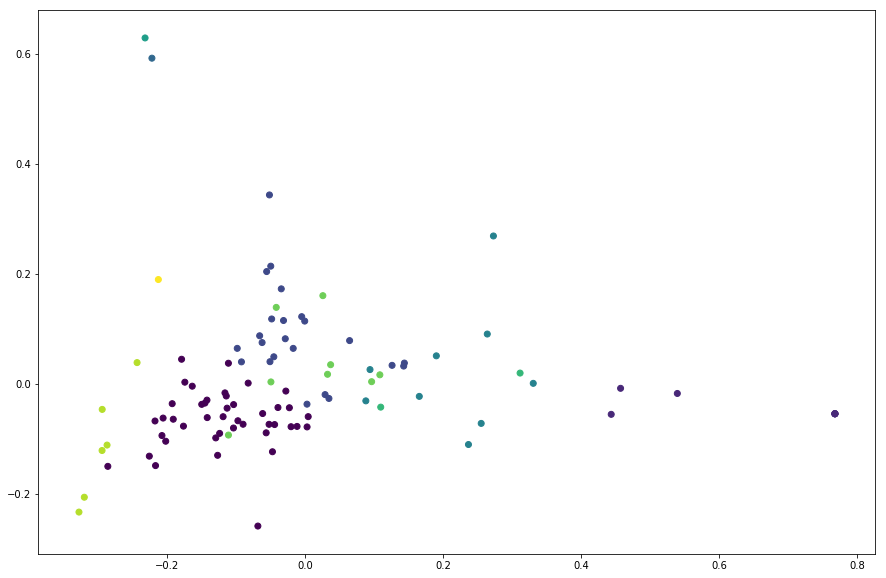

In [71]:
from sklearn.decomposition import PCA
import pylab as pl
%matplotlib inline
pca = PCA(n_components=2).fit(sc_grouped_clustering)
pca_2d = pca.transform(sc_grouped_clustering)
pl.figure('Scatter Plot')
pl.figure(figsize=(15, 10))
pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_, marker='o')
pl.show()

In [72]:
sc_merged[sc_merged['1st Most Common Venue'].str.contains('Sea')]

,Name,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,"Chesterfield, SC",34.650058,-80.141784,5,Seafood Restaurant,Wings Joint,Caribbean Restaurant,French Restaurant,Food Truck,Food Stand,Food Court,Fish & Chips Shop,Fast Food Restaurant,Donut Shop
63,"Edisto Beach, SC",32.479355,-80.334823,2,Seafood Restaurant,Pizza Place,American Restaurant,Sandwich Place,Breakfast Spot,Food Truck,Food Court,Fish & Chips Shop,Fast Food Restaurant,Donut Shop
72,"Folly Beach, SC",32.654997,-79.940609,2,Seafood Restaurant,American Restaurant,Sandwich Place,Mexican Restaurant,Café,Food Truck,Breakfast Spot,Irish Pub,BBQ Joint,Pizza Place
80,"Georgetown, SC",33.376834,-79.294496,0,Seafood Restaurant,American Restaurant,Fast Food Restaurant,Pizza Place,Japanese Restaurant,Deli / Bodega,Sushi Restaurant,Chinese Restaurant,Diner,Mexican Restaurant
112,"Jefferson, SC",34.649889,-80.389540,2,Seafood Restaurant,Steakhouse,Southern / Soul Food Restaurant,American Restaurant,BBQ Joint,Creperie,Cuban Restaurant,Deli / Bodega,Diner,Donut Shop


In [73]:
sc_venues[sc_venues["Venue Category"].str.contains("Sea")].shape[0]

133

In [74]:
sc_seaf = sc_venues[sc_venues["Venue Category"].str.contains("Sea")]

# create map of South Carolin using latitude and longitude values
map_sc_seaf = folium.Map(location=[33.6874388, -80.4363743], zoom_start=7)

# add markers to map
for lat, lng, Name in zip(sc_seaf['Venue Latitude'], sc_seaf['Venue Longitude'], sc_seaf['Venue']):
    label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sc_seaf)  
    
map_sc_seaf

In [75]:
sc_chicken = sc_venues[sc_venues["Venue Category"].str.contains("Chicken")]

# create map of South Carolina using latitude and longitude values
map_sc_chick = folium.Map(location=[33.6874388, -80.4363743], zoom_start=7)

# add markers to map
for lat, lng, Name in zip(sc_chicken['Venue Latitude'], sc_chicken['Venue Longitude'], sc_chicken['Venue']):
    label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sc_chick)  
    
map_sc_chick

In [76]:
sc_steak = sc_venues[sc_venues["Venue Category"].str.contains("Steak")]

# create map of South Carolina using latitude and longitude values
map_sc_steak = folium.Map(location=[33.6874388, -80.4363743], zoom_start=7)

# add markers to map
for lat, lng, Name in zip(sc_steak['Venue Latitude'], sc_steak['Venue Longitude'], sc_steak['Venue']):
    label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sc_steak)  
    
map_sc_steak